針對臉部真操，常使用的方式
1. Face detection with Haarcascade and
OpenCV
2. Face detection with HOG and Dlib
3. Face detection with CNN and Dlib
4. Face detection using webcam

## PIXELS
![upgit_20240513_1715580599.png](https://raw.githubusercontent.com/kcwc1029/obsidian-upgit-image/main/2024/05/upgit_20240513_1715580599.png)

## cascade classifier

準備兩組資料，分別為有臉跟沒臉的。並放進AdaBoost Training 演算法

AdaBoost Training 演算法會返回每一個小塊的特徵值（feature selection）

計算特徵值方式：
![upgit_20240513_1715581364.png](https://raw.githubusercontent.com/kcwc1029/obsidian-upgit-image/main/2024/05/upgit_20240513_1715581364.png)

圖片取出特徵值後，遂給分類器，每一個分類器代表一個特徵，True就繼續全送給下一個分類器，以此類推，將所有特徵值檢測完畢，才算是一個真操到的圖片。

![upgit_20240513_1715581592.png](https://raw.githubusercontent.com/kcwc1029/obsidian-upgit-image/main/2024/05/upgit_20240513_1715581592.png)

In [ ]:
# colab授權使用google drive
# from google.colab import drive 
# drive.mount('/content/drive')

In [2]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./Images/people1.jpg')
print(image.shape)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)


(1280, 1920, 3)
(1280, 1920)


## Face detection with Haarcascade and OpenCV

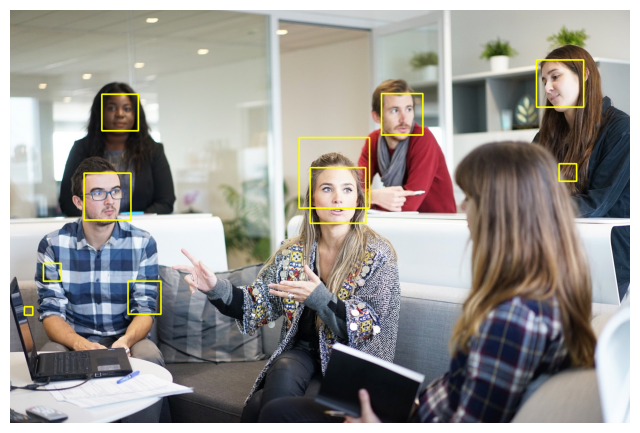

In [17]:
face_detector = cv2.CascadeClassifier('./Cascades/haarcascade_frontalface_default.xml')

detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.09)
# print(detections, len(detections)) # 偵測出來的特徵m

for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 3)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)


### 汽車偵測

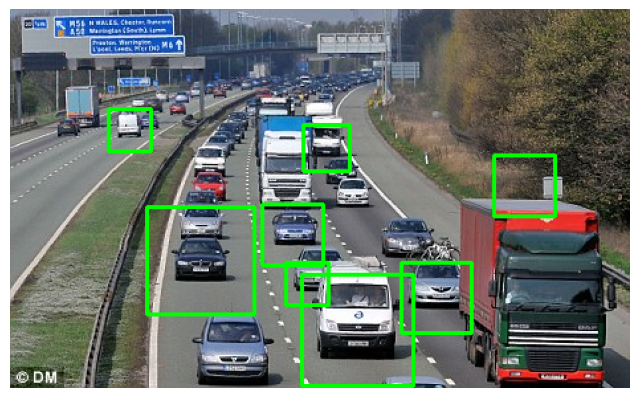

In [21]:
car_detector = cv2.CascadeClassifier('./Cascades/cars.xml')
image = cv2.imread('./Images/car.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=5)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

### 時鐘偵測

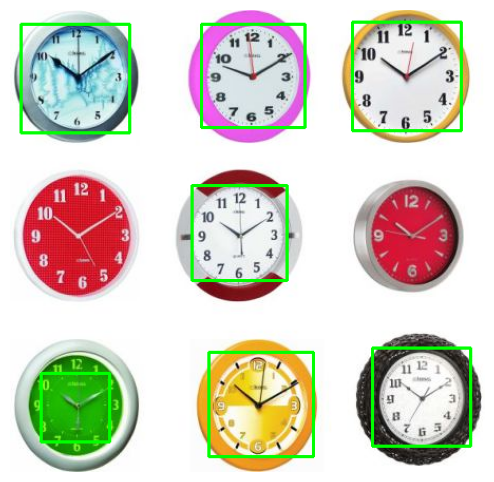

In [24]:
clock_detector = cv2.CascadeClassifier('./Cascades/clocks.xml')
image = cv2.imread('./Images/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray, scaleFactor = 1.01, minNeighbors=6)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

### 全身偵測

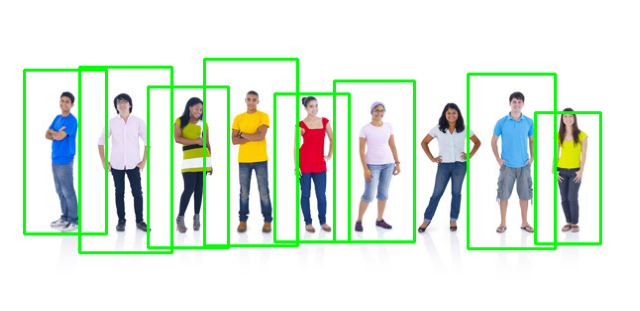

In [25]:
full_detector = cv2.CascadeClassifier('./Cascades/fullbody.xml')
image = cv2.imread('./Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.05, minNeighbors=5,
                                              minSize = (50,50))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

## HOG（Histogram of Oriented Gradients）人脸检测器来检测图像中的人脸。

![upgit_20240513_1715585654.png](https://raw.githubusercontent.com/kcwc1029/obsidian-upgit-image/main/2024/05/upgit_20240513_1715585654.png)

![upgit_20240513_1715585704.png](https://raw.githubusercontent.com/kcwc1029/obsidian-upgit-image/main/2024/05/upgit_20240513_1715585704.png)

偵測到的數量 13


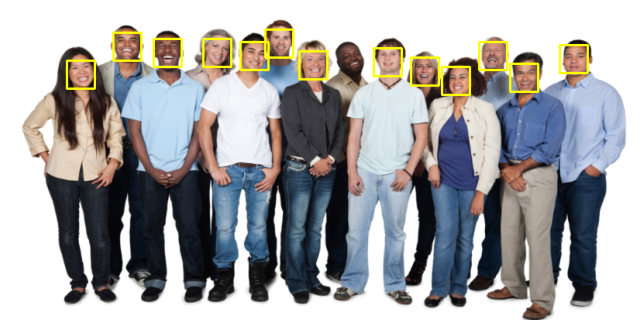

In [4]:
import dlib

image = cv2.imread('./Images/people2.jpg')
image = cv2.resize(image, (800, 400))

# TODO: 進行臉部偵測，返回偵測到的位置

# 使用dlib庫中的get_frontal_face_detector()方法獲取一個用於檢測正面人臉的物件檢測器
face_detector_hog = dlib.get_frontal_face_detector()
# 使用檢測器在圖像(image)中檢測人臉,參數1表示使用預設的取樣比例
detections = face_detector_hog(image, 1)
# 打印檢測到的人臉矩形框數量及其列表
print("偵測到的數量", len(detections))
# print(detections)

# TODO: 把偵測到得臉，畫出來
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)


## 在dlib庫裡面使用CNN 檢測人臉

參考文章：https://ithelp.ithome.com.tw/articles/10264199

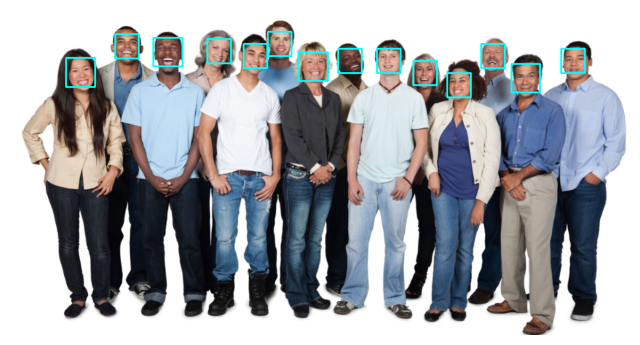

In [36]:
image = cv2.imread('./Images/people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('./Weights/mmod_human_face_detector.dat')

detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  # print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

## Haarcascade x HOG x CNN 三種辨別方式進行比較

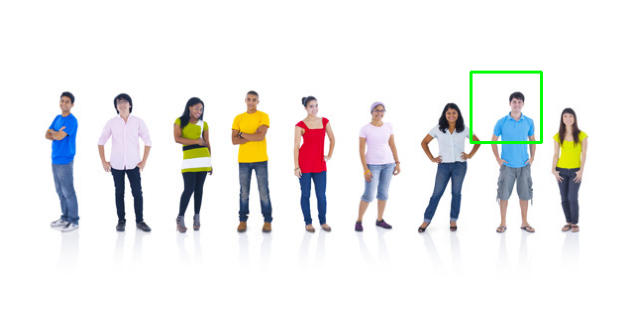

In [38]:
# Haarcascade
image = cv2.imread('./Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('./Cascades/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
  
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

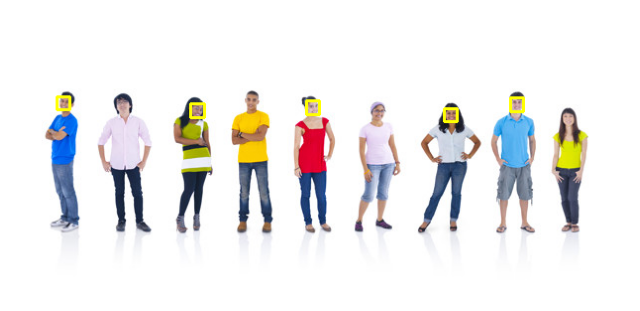

In [39]:
# HOG
image = cv2.imread('./Images/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)

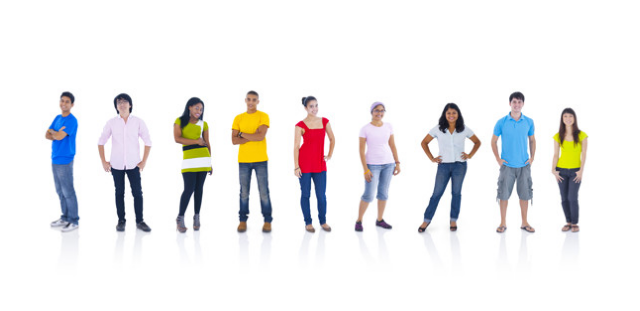

In [8]:
# CNN
image = cv2.imread('./Images/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('./Weights/mmod_human_face_detector.dat')
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  # print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=[8, 6])
plt.axis('off')
plt.imshow(image)